In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 성적 데이터 생성

In [23]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index = ['호랑이','여우','북극곰','사자'], columns = ['시간','성적'])
data

,시간,성적
호랑이,2,20
여우,4,40
북극곰,8,80
사자,9,90


### 1. 경사하강법
- 가중치(w)변화에 따른 비용함수(cost)값의 변화 그래프

#### H(x)   (가설)

In [24]:
def h(w, x):  # 가설함수
    return w*x+0

#### cost function (비용함수)

In [25]:
def cost(data, target, weight):   # MSE(평균제곱오차)
    y_pre = h(weight, data)       # 예측값
    return ((y_pre - target) ** 2).mean()

In [26]:
cost(data['시간'], data['성적'], 3)

2021.25

In [27]:
cost(data['시간'], data['성적'], 10)

0.0

In [28]:
weight_arr = range(-10,31)

In [29]:
cost_list = []
for w in weight_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)

In [30]:
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

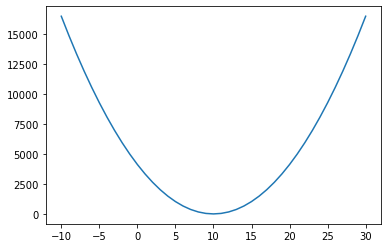

In [31]:
plt.plot(weight_arr, cost_list)
plt.show()

In [32]:
from sklearn.linear_model import SGDRegressor

In [33]:
sgd_model = SGDRegressor(max_iter = 100, # 가중치 업데이트 횟수(epoch)
                         eta0 = 0.001, # 학습률 (learning rate)
                         verbose = 1) # 학습 과정 확인 가능

In [34]:
sgd_model.fit(data[['시간']], data['성적']) # 주의 : 문제는 2차원 형태로 넣어줘야 함.

-- Epoch 1
Norm: 1.27, NNZs: 1, Bias: 0.176580, T: 4, Avg. loss: 1896.040925
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 1, Bias: 0.296711, T: 8, Avg. loss: 1467.919165
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.81, NNZs: 1, Bias: 0.393454, T: 12, Avg. loss: 1199.342083
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.39, NNZs: 1, Bias: 0.474889, T: 16, Avg. loss: 996.027353
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 1, Bias: 0.545143, T: 20, Avg. loss: 840.377781
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 1, Bias: 0.606999, T: 24, Avg. loss: 714.363003
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.74, NNZs: 1, Bias: 0.661788, T: 28, Avg. loss: 612.701368
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.09, NNZs: 1, Bias: 0.711057, T: 32, Avg. loss: 527.916188
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.41, NNZs: 1, Bias: 0.755340, T: 36, Avg. loss: 457.656618
Total training time: 0.00 

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.001, max_iter=100, verbose=1)

In [35]:
sgd_model.predict([[7]])

array([69.5697089])

In [36]:
print(sgd_model.coef_)  # 가중치값
print(sgd_model.intercept_) # 바이어스 값

[9.74765943]
[1.33609289]


### 수학 공식을 이용한 해석적 모델
- LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear_model = LinearRegression()

In [39]:
linear_model.fit(data[['시간']], data[['성적']])

LinearRegression()

In [40]:
linear_model.predict([[7]])

array([[70.]])

In [41]:
print(linear_model.coef_)  # 가중치값
print(linear_model.intercept_) # 바이어스 값

[[10.]]
[7.10542736e-15]


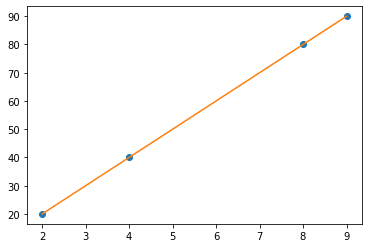

In [42]:
X = data['시간']
y = data['성적']
plt.plot(X,y, 'o')
plt.plot(X,linear_model.predict(X.values.reshape(-1,1)))
plt.show()

In [43]:
X.values.reshape(-1,1)

array([[2],
       [4],
       [8],
       [9]], dtype=int64)